# **Dividend Discount Model**

## Juan Diego Tabares

## May 2024

This brief lab explores results for a trading strategy using the Dividend Discount Model. 

The analysis involves:

- Downloading historical data for financial assets
- Performing graphical analysis 
- Developing a trading strategy based on value investing
- Displaying the result

In [1]:
# Libraries

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import yahoo_fin.stock_info as si
import requests
import tools_kit as kit
import warnings 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import seaborn as sns

In [2]:
# Settings the warnings to be ignored 

warnings.filterwarnings('ignore') 

In this lab we limit the analysis to two stocks (AAPL and MSFT) and an index representing the market (S&P500) for the period 2014 - 03-2024.

In [3]:
tickers = ['^GSPC', 'AAPL', 'MSFT']

In [4]:
data_prices = kit.get_price(tickers, '2004-01-01', '2024-03-31')

[*********************100%***********************]  3 of 3 completed


In [5]:
data_prices.head()

,AAPL,MSFT,^GSPC
Date,,,
2004-01-02,0.321272,17.105959,1108.479980
2004-01-05,0.334709,17.535950,1122.219971
2004-01-06,0.333501,17.598263,1123.670044
2004-01-07,0.341050,17.579575,1126.329956
2004-01-08,0.352675,17.548409,1131.920044


In [6]:
## Daily returns for the two selected stocks and the market

daily_returns = data_prices.pct_change()
daily_returns.iloc[0] = 0
daily_returns.head()

,AAPL,MSFT,^GSPC
Date,,,
2004-01-02,0.000000,0.000000,0.000000
2004-01-05,0.041823,0.025137,0.012395
2004-01-06,-0.003610,0.003553,0.001292
2004-01-07,0.022636,-0.001062,0.002367
2004-01-08,0.034086,-0.001773,0.004963


From the box and whisker plot, we can see a daily return volatility higher for APPL than MSFT and the market.

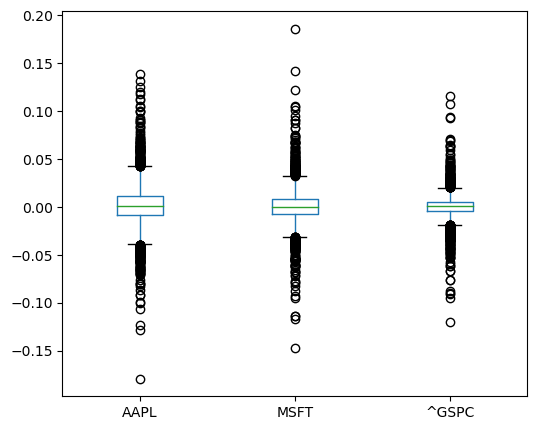

In [7]:
daily_returns.boxplot(figsize=(6, 5), grid=False)
plt.show()

In line with the higher volatility, the daily expected return is also higher for AAPL than its MSFT peer.

In [8]:
vol=daily_returns.std()
exp_return=daily_returns.mean()

In [9]:
exp_return

AAPL     0.001448
MSFT     0.000772
^GSPC    0.000378
dtype: float64

In [10]:
vol

AAPL     0.020727
MSFT     0.016979
^GSPC    0.011997
dtype: float64

In [11]:
# Annualizing the volatility and the expected returns

Annualized_Return = kit.annualize_rets(daily_returns, 252)
Annualized_Vol = kit.annualize_vol(daily_returns, 252)

In [12]:
Annualized_Return

AAPL     0.364245
MSFT     0.171565
^GSPC    0.080019
dtype: float64

In [13]:
Annualized_Vol

AAPL     0.329039
MSFT     0.269530
^GSPC    0.190446
dtype: float64

As AAPL displays a higher expected return, from this point onwards we will use it for our analysis and trading strategy. Its performance in relation to the market has a positive slope.

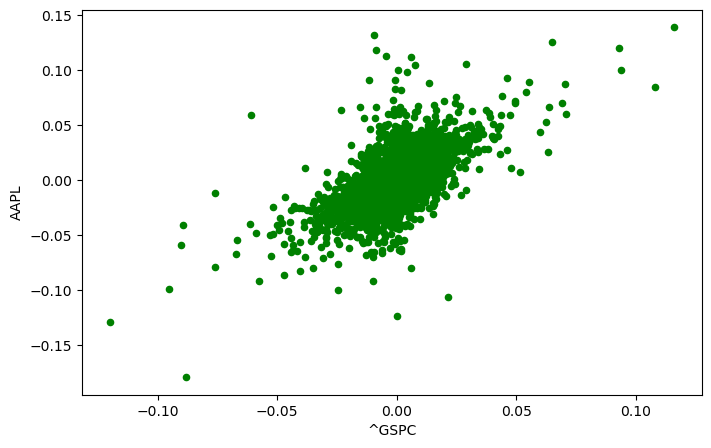

In [14]:
daily_returns.plot(kind = 'scatter', x = '^GSPC', y = 'AAPL',figsize=(8, 5),color='green')
plt.show()

In order to go on with the estimation of a dividend discount model we will utilize the CAPM to estimate the required rate of return (r). From the CAPM we got beta=1.0796. 

In [15]:
exp_var = pd.DataFrame(daily_returns['^GSPC'])
exp_var['Constant'] = 1
lm = sm.OLS(daily_returns['AAPL'], exp_var).fit()

In [16]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.390
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     3262.
Date:                Sun, 26 May 2024   Prob (F-statistic):               0.00
Time:                        18:57:20   Log-Likelihood:                 13779.
No. Observations:                5094   AIC:                        -2.755e+04
Df Residuals:                    5092   BIC:                        -2.754e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^GSPC          1.0796      0.019     57.116      0.000       1.043       1.117
Constant       0.0010      0.000      4.585      0.000       0.001       0.001
==============================================================================
Omnibus:                     1089.813   Durbin-Watson:                   1.926
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            15027.314
Skew:                           0.629   Prob(JB):                         0.00
Kurtosis:                      11.320   Cond. No.                         83.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Other (simplier?) way to calculate r is using the covariance between the stock and the market, and the variance of the market.

In [17]:
cov = np.cov(daily_returns['^GSPC'], daily_returns['AAPL'])[0][1]
var = np.cov(daily_returns['^GSPC'], daily_returns['AAPL'])[0][0]

In [18]:
beta = cov/var
beta

1.0796376277472948

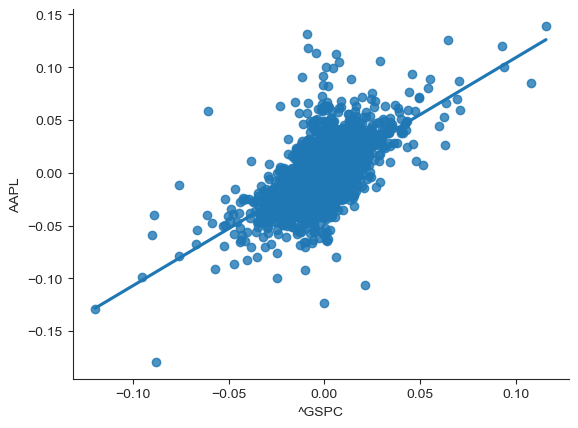

In [19]:
sns.set_style('ticks')
sns.regplot(daily_returns['^GSPC'], daily_returns['AAPL'], ci=None)
sns.despine()
plt.show()

Assuming (!) a market expected return at 11% for 2024, the required rate of return for AAPL is 12. 

In [20]:
beta*(0.11)

0.11876013905220242

In what follows we change the period considered for the estimation. How has changed the beta for AAPL for each decade?

In [21]:
daily_returns_2014=pd.DataFrame(daily_returns.loc['2014-01-01':'2014-12-31'])
daily_returns_2015=pd.DataFrame(daily_returns.loc['2015-01-01':'2015-12-31'])
daily_returns_2016=pd.DataFrame(daily_returns.loc['2016-01-01':'2016-12-31'])
daily_returns_2017=pd.DataFrame(daily_returns.loc['2017-01-01':'2017-12-31'])
daily_returns_2018=pd.DataFrame(daily_returns.loc['2018-01-01':'2018-12-31'])
daily_returns_2019=pd.DataFrame(daily_returns.loc['2019-01-01':'2019-12-31'])
daily_returns_2020=pd.DataFrame(daily_returns.loc['2020-01-01':'2020-12-31'])
daily_returns_2021=pd.DataFrame(daily_returns.loc['2021-01-01':'2021-12-31'])
daily_returns_2022=pd.DataFrame(daily_returns.loc['2022-01-01':'2022-12-31'])
daily_returns_2023=pd.DataFrame(daily_returns.loc['2023-01-01':'2023-12-31'])
daily_returns_2024=pd.DataFrame(daily_returns.loc['2024-01-01':])

For 2014 the beta for AAPL is 0.84 meaning that at that time it could be considered a defensive stock.

In [22]:
cov_2014 = np.cov(daily_returns_2014['^GSPC'], daily_returns_2014['AAPL'])[0][1]
var_2014 = np.cov(daily_returns_2014['^GSPC'], daily_returns_2014['AAPL'])[0][0]
beta_2014 = cov_2014/var_2014
beta_2014

0.8390839360106433

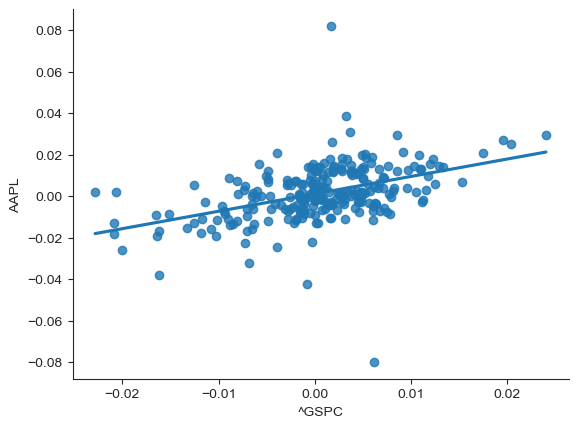

In [23]:
sns.set_style('ticks')
sns.regplot(daily_returns_2014['^GSPC'], daily_returns_2014['AAPL'], ci=None)
sns.despine()
plt.show()

In [24]:
exp_var_2014 = pd.DataFrame(daily_returns_2014['^GSPC'])
exp_var_2014['Constant'] = 1
lm_2014 = sm.OLS(daily_returns_2014['AAPL'], exp_var_2014).fit()

In [25]:
lm_2014.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   AAPL   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     60.20
Date:                Sun, 26 May 2024   Prob (F-statistic):           2.18e-13
Time:                        18:57:20   Log-Likelihood:                 752.34
No. Observations:                 252   AIC:                            -1501.
Df Residuals:                     250   BIC:                            -1494.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
^GSPC          0.8391      0.108      7.759      0.000       0.626       1.052
Constant       0.0011      0.001      1.376      0.170      -0.000       0.003
==============================================================================
Omnibus:                       76.013   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2583.659
Skew:                          -0.336   Prob(JB):                         0.00
Kurtosis:                      18.672   Cond. No.                         140.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

For 2023 the result is 1.11 meaning it could be considered an aggressive stock, in contrast with the result for 2014. The relationship of AAPL has change through the years.

In [26]:
cov_2023 = np.cov(daily_returns_2023['^GSPC'], daily_returns_2023['AAPL'])[0][1]
var_2023 = np.cov(daily_returns_2023['^GSPC'], daily_returns_2023['AAPL'])[0][0]
beta_2023 = cov_2023/var_2023
beta_2023

1.114297275238846

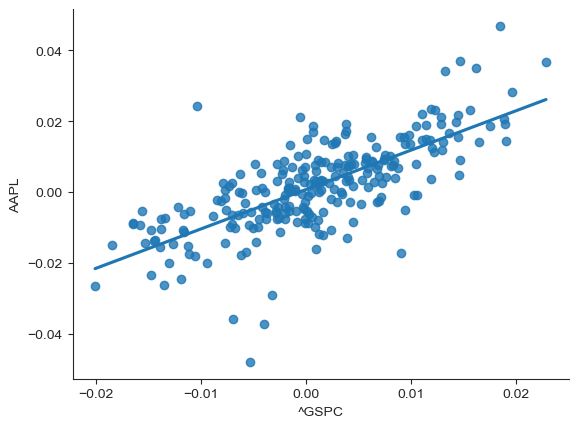

In [27]:
sns.set_style('ticks')
sns.regplot(daily_returns_2023['^GSPC'], daily_returns_2023['AAPL'], ci=None)
sns.despine()
plt.show()

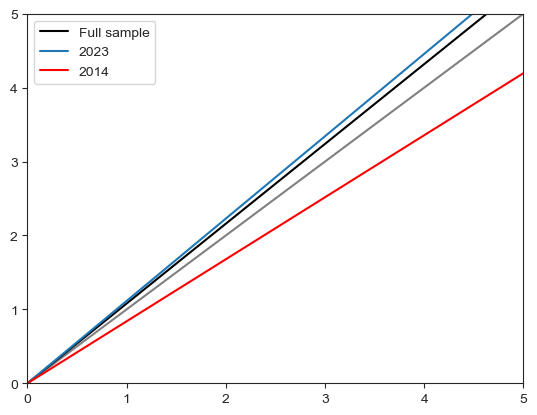

In [28]:
fig, ax = plt.subplots()

ax.axline((0, 0), slope=1, color='gray', label='')
ax.axline((0, 0), slope=beta, color='black', label='Full sample')
ax.axline((0, 0), slope=beta_2023, color='C0', label='2023')
ax.axline((0, 0), slope=beta_2014, color='red', label='2014')
ax.set_xlim(0, 5)
ax.set_ylim(0, 5) 
ax.legend()
plt.show()

In [29]:
cov_2015 = np.cov(daily_returns_2015['^GSPC'], daily_returns_2015['AAPL'])[0][1]
var_2015 = np.cov(daily_returns_2015['^GSPC'], daily_returns_2015['AAPL'])[0][0]
beta_2015 = cov_2015/var_2015

cov_2016 = np.cov(daily_returns_2016['^GSPC'], daily_returns_2016['AAPL'])[0][1]
var_2016 = np.cov(daily_returns_2016['^GSPC'], daily_returns_2016['AAPL'])[0][0]
beta_2016 = cov_2016/var_2016

cov_2017 = np.cov(daily_returns_2017['^GSPC'], daily_returns_2017['AAPL'])[0][1]
var_2017 = np.cov(daily_returns_2017['^GSPC'], daily_returns_2017['AAPL'])[0][0]
beta_2017 = cov_2017/var_2017

cov_2018 = np.cov(daily_returns_2018['^GSPC'], daily_returns_2018['AAPL'])[0][1]
var_2018 = np.cov(daily_returns_2018['^GSPC'], daily_returns_2018['AAPL'])[0][0]
beta_2018 = cov_2018/var_2018

cov_2019 = np.cov(daily_returns_2019['^GSPC'], daily_returns_2019['AAPL'])[0][1]
var_2019 = np.cov(daily_returns_2019['^GSPC'], daily_returns_2019['AAPL'])[0][0]
beta_2019 = cov_2019/var_2019

cov_2020 = np.cov(daily_returns_2020['^GSPC'], daily_returns_2020['AAPL'])[0][1]
var_2020 = np.cov(daily_returns_2020['^GSPC'], daily_returns_2020['AAPL'])[0][0]
beta_2020 = cov_2020/var_2020

cov_2021 = np.cov(daily_returns_2021['^GSPC'], daily_returns_2021['AAPL'])[0][1]
var_2021 = np.cov(daily_returns_2021['^GSPC'], daily_returns_2021['AAPL'])[0][0]
beta_2021 = cov_2021/var_2021

cov_2022 = np.cov(daily_returns_2022['^GSPC'], daily_returns_2022['AAPL'])[0][1]
var_2022 = np.cov(daily_returns_2022['^GSPC'], daily_returns_2022['AAPL'])[0][0]
beta_2022 = cov_2022/var_2022

cov_2024 = np.cov(daily_returns_2024['^GSPC'], daily_returns_2024['AAPL'])[0][1]
var_2024 = np.cov(daily_returns_2024['^GSPC'], daily_returns_2024['AAPL'])[0][0]
beta_2024 = cov_2024/var_2024

In [30]:
df_betas_2014_2023=pd.DataFrame(np.array([beta_2014, beta_2015, beta_2016, beta_2017, beta_2018, beta_2019,
                 beta_2020, beta_2021, beta_2022, beta_2023]))
df_betas_2014_2023 = df_betas_2014_2023.rename(columns={0: 'Beta'})
df_betas_2014_2023['Year']=['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023']

In [31]:
betas_2014_2023=pd.Series(np.array([beta_2014, beta_2015, beta_2016, beta_2017, beta_2018, beta_2019,
                 beta_2020, beta_2021, beta_2022, beta_2023]))

In [32]:
df_betas_2014_2023

,Beta,Year
0,0.839084,2014
1,1.145764,2015
2,1.008615,2016
3,1.364059,2017
4,1.256513,2018
5,1.557197,2019
6,1.123287,2020
7,1.314404,2021
8,1.307855,2022
9,1.114297,2023


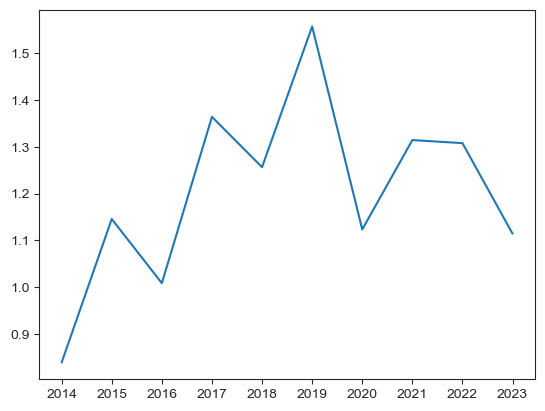

In [33]:
plt.plot(df_betas_2014_2023['Year'], df_betas_2014_2023['Beta'])
plt.show()

In [34]:
mean_betas_2014_2023=betas_2014_2023.mean()

In [35]:
print('mean 2014-2023:', round(mean_betas_2014_2023,2), 
     'Full sample:', round(beta,2), 'beta_2023:', round(beta_2023,2),  'beta_2024:', round(beta_2024,2), sep='\n')

mean 2014-2023:
1.2
Full sample:
1.08
beta_2023:
1.11
beta_2024:
0.99


In [36]:
# Dividends 2014-2024

dividends=kit.get_dividends('AAPL')
dividends

,Dividends
Date,
2014-12-31 00:00:00-05:00,0.461429
2015-12-31 00:00:00-05:00,0.507500
2016-12-31 00:00:00-05:00,0.557500
2017-12-31 00:00:00-05:00,0.615000
2018-12-31 00:00:00-05:00,0.705000
2019-12-31 00:00:00-05:00,0.760000
2020-12-31 00:00:00-05:00,0.807500
2021-12-31 00:00:00-05:00,0.865000
2022-12-31 00:00:00-05:00,0.910000


In [37]:
dividends=dividends.loc['2014-12-31':'2023-12-31']

To estimate the expected dividends in 2024 we use the mean growth rate between 2014 and 2023.

In [38]:
# Dividend growth rate

g=dividends.pct_change().mean()
round(float(g),3)

0.084

The estimation for the market return at 9% is retrieved from  https://www.barrons.com/articles/stock-market-economy-predictions-big-money-poll-e60afb13

In [39]:
r_mean=mean_betas_2014_2023*(0.09)
r_full_sample=beta*(0.09)
r_2023=beta_2023*(0.09)
r_2024=beta_2024*(0.09)

In [40]:
d_0=dividends.loc['2023-12-31']*(1+g)

In [41]:
p_mean=int(d_0/(r_mean-g))
p_full_sample=int(d_0/(r_full_sample-g))
p_2023=int(d_0/(r_2023-g))
p_2024=int(d_0/(r_2024-g))

Depending on what beta we use (for 2023, the full sample 2014-2024, the yearly mean) we can get different results. What should we use? In what follows we include the P/E ratio to bring more context and make a reasonable guess for the strategy.

In [42]:
print(p_mean, p_full_sample, p_2023, p_2024)

42 77 63 202


In [43]:
dividends_2022=dividends.loc['2014-12-31':'2022-12-31']
g_2022=dividends_2022.pct_change().mean()
d_0_2023=dividends.loc['2022-12-31']*(1+g_2022)
r_2023=beta_2022*(0.09)
p_2023_1=int(d_0_2023/(r_2023-g))
p_2023_1

29

In [44]:
API_KEY = 'YG0VYAR41BPEJCPH'  

url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=AAPL&apikey={API_KEY}'
r = requests.get(url)
data = r.json()

In [45]:
quarterly_earnings = data['annualEarnings']
    # Create a DataFrame from the quarterly earnings data
df_quarterly_earnings = pd.DataFrame(quarterly_earnings)
    # Convert the 'fiscalDateEnding' to datetime
df_quarterly_earnings['fiscalDateEnding'] = pd.to_datetime(df_quarterly_earnings['fiscalDateEnding'])
    # Set the 'fiscalDateEnding' as the index
df_quarterly_earnings.set_index('fiscalDateEnding', inplace=True)
    # Convert the 'reportedEPS' to numeric
df_quarterly_earnings['reportedEPS'] = pd.to_numeric(df_quarterly_earnings['reportedEPS'])
df_quarterly_earnings=df_quarterly_earnings['reportedEPS']

In [46]:
EPS_2022=df_quarterly_earnings.loc['2022']
Price_2022=data_prices['AAPL']['2022-09-30']
PE_2022=np.double(Price_2022/EPS_2022)
PE_2022

22.39668576104746

In [47]:
EPS_2021=df_quarterly_earnings.loc['2021']
Price_2021=data_prices['AAPL']['2021-09-30']
PE_2021=np.double(Price_2021/EPS_2021)

EPS_2020=df_quarterly_earnings.loc['2020']
Price_2020=data_prices['AAPL']['2020-09-30']
PE_2020=np.double(Price_2020/EPS_2020)

EPS_2019=df_quarterly_earnings.loc['2019']
Price_2019=data_prices['AAPL']['2019-09-30']
PE_2019=np.double(Price_2019/EPS_2019)

EPS_2018=df_quarterly_earnings.loc['2018']
Price_2018=data_prices['AAPL']['2018-09-28']
PE_2018=np.double(Price_2018/EPS_2018)

EPS_2017=df_quarterly_earnings.loc['2017']
Price_2017=data_prices['AAPL']['2017-09-29']
PE_2017=np.double(Price_2017/EPS_2017)

EPS_2016=df_quarterly_earnings.loc['2016']
Price_2016=data_prices['AAPL']['2016-09-30']
PE_2016=np.double(Price_2016/EPS_2016)

EPS_2015=df_quarterly_earnings.loc['2015']
Price_2015=data_prices['AAPL']['2015-09-30']
PE_2015=np.double(Price_2015/EPS_2015)

EPS_2014=df_quarterly_earnings.loc['2014']
Price_2014=data_prices['AAPL']['2014-09-30']
PE_2014=np.double(Price_2014/EPS_2014)

EPS_2023=df_quarterly_earnings.loc['2023']
Price_2023=data_prices['AAPL']['2023-09-29']
PE_2023=np.double(Price_2023/EPS_2023)


PE = {'Year': ['2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
        'PE': [PE_2014, PE_2015, PE_2016, PE_2017, PE_2018, PE_2019, PE_2020, PE_2021, PE_2022]}

df_PE = pd.DataFrame(PE)

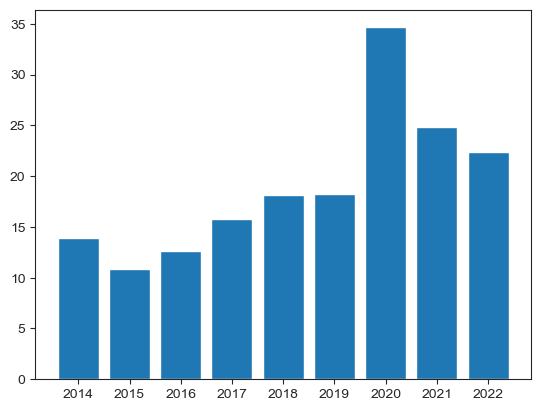

In [48]:
plt.bar(PE['Year'], PE['PE'])
plt.show()

In 2022 the market was valuing AAPL more than 20 times its earning generation power, displaying a belief in (or discounting) future earnings growth. Our estimation of the price for 2023 is ca 5 times its earnigs power at 2022 fiscal ending.

Growth expectations 2019-2022

In [49]:
dividends_2021=dividends.loc['2014-12-31':'2021-12-31']
g_2021=dividends_2021.pct_change().mean()

dividends_2020=dividends.loc['2014-12-31':'2020-12-31']
g_2020=dividends_2020.pct_change().mean()
round(float(g_2020),3)

dividends_2019=dividends.loc['2014-12-31':'2019-12-31']
g_2019=dividends_2019.pct_change().mean()
round(float(g_2019),3)

dividends_2018=dividends.loc['2014-12-31':'2018-12-31']
g_2018=dividends_2018.pct_change().mean()
round(float(g_2018),3)

print(round(float(g_2021),3), round(float(g_2020),3), round(float(g_2019),3), round(float(g_2018),3))

0.094 0.098 0.105 0.112


In [50]:
# check difference with actuals

d_0_2022=dividends.loc['2021-12-31']*(1+g_2021)
d_0_2021=dividends.loc['2020-12-31']*(1+g_2020)
d_0_2020=dividends.loc['2019-12-31']*(1+g_2019)
d_0_2019=dividends.loc['2018-12-31']*(1+g_2018)

print(d_0_2019, d_0_2020, d_0_2021, d_0_2022)

Dividends    0.783933
dtype: float64 Dividends    0.839931
dtype: float64 Dividends    0.886684
dtype: float64 Dividends    0.946504
dtype: float64


In [51]:
Year=['2019', '2020', '2021', '2022']
Actuals=[float(dividends.iloc[5]), float(dividends.iloc[6]), float(dividends.iloc[7]), float(dividends.iloc[8])]
Estimation=[float(d_0_2019), float(d_0_2020), float(d_0_2021), float(d_0_2022)]
df_dividends=pd.DataFrame(Year)
df_dividends=df_dividends.rename(columns={0: 'Year'})
df_dividends['Estimation']=Estimation
df_dividends['Actuals']=Actuals

In [52]:
df_dividends

,Year,Estimation,Actuals
0,2019,0.783933,0.7600
1,2020,0.839931,0.8075
2,2021,0.886684,0.8650
3,2022,0.946504,0.9100


Our estimations seems to be optimistics regarding the realizations.

In [53]:
print(g_2018, g_2019, g_2020, g_2021)

Dividends    0.111962
dtype: float64 Dividends    0.105172
dtype: float64 Dividends    0.09806
dtype: float64 Dividends    0.094224
dtype: float64


In [54]:
r_2022=beta_2021*(0.09)
p_2022=int(d_0_2022/(r_2022-g_2021))

r_2021=beta_2020*(0.09)
p_2021=int(d_0_2021/(r_2021-g_2020))

r_2020=beta_2019*(0.09)
p_2020=int(d_0_2020/(r_2020-g_2019))

r_2019=beta_2018*(0.09)
p_2019=int(d_0_2019/(r_2019-g_2018))

In [55]:
print(p_2019, p_2020, p_2021, p_2022)

697 24 292 39


From the model we can see a high estimation for the price in 2019 and 2021. This is due to the small difference between the required rate of return (r) and the dividend growth rate (g), displaying the sensitivity of the outcome to small changes in the estimations. It is worth noting we use 9% as the market return for each year. 

Following the recommendation of the model, a buy signal can be taken at the beginning of those two years -> the price at the end of the previous year was below the estimated price. In both cases the recommendation will be profitable.

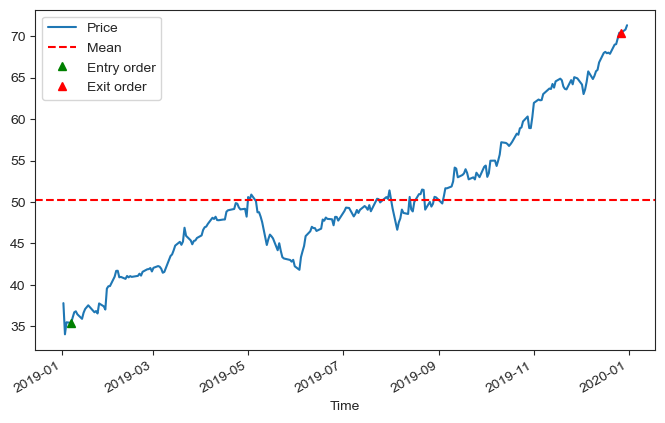

In [56]:
data_prices['AAPL']['2019-01-01':'2019-12-31']

data_prices['AAPL']['2019-01-01':'2019-12-31'].plot(figsize=(8,5))
plt.axhline(data_prices['AAPL']['2019-01-01':'2019-12-31'].mean(), color='red', linestyle='--') 
data_prices['AAPL']['2019-01-07':'2019-01-07'].plot(color='g', linestyle='None', marker='^')
data_prices['AAPL']['2019-12-27':'2019-12-27'].plot(color='r', linestyle='None', marker='^')
plt.xlabel('Time')
plt.legend(['Price', 'Mean', 'Entry order', 'Exit order'])
plt.show()

#buy[60:].plot(color='g', linestyle='None', marker='^')
#sell[60:].plot(color='r', linestyle='None', marker='^')

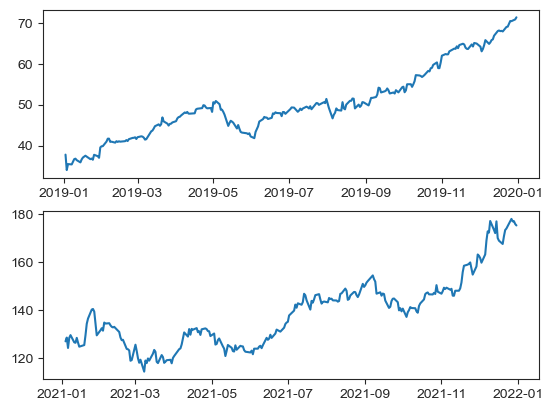

In [57]:
# 2019 
fig, (ax1, ax2) = plt.subplots(2)

ax1.plot(data_prices['AAPL']['2019-01-01':'2019-12-31'])
ax2.plot(data_prices['AAPL']['2021-01-01':'2021-12-31'])
plt.show()
#data_prices['AAPL']['2021-01-01':'2021-12-31'].plot(figsize=(10,5)) 
#plt.axhline(data_prices['AAPL']['2021'].mean(), color='red', linestyle='--') 
#plt.xlabel('Time')
#plt.legend(['Price', 'Mean'])
#plt.show()

In [58]:
#First Monday, last Friday
return_2019=((data_prices['AAPL']['2019-12-27']/data_prices['AAPL']['2019-01-07'])-1)*100
return_2021=((data_prices['AAPL']['2021-12-31']/data_prices['AAPL']['2021-01-04'])-1)*100

print('Return 2019:', round(return_2019,2))
print('Return 2021:', round(return_2021,2))

Return 2019: 98.85
Return 2021: 38.06
